## Analysis of Bridget Jones:

* What does the subsampled data look like : Data structure, trends if any ? 

* Do I need access to the bigger dataset? 


The number of days she weighed herself is 20


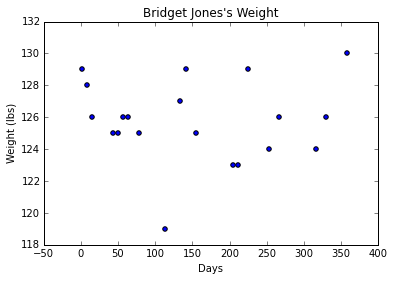

In [2]:
%matplotlib inline
import json
import warnings
warnings.filterwarnings('ignore')
book1 = 'book_1_gist_subsampled.json'
data = json.loads(open(book1).read())
print 'The number of days she weighed herself is %d' % len(data)
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
day_nos = []
weights = []
for key in sorted(data.iterkeys(), key=int):
    day_nos.append(int(key))
    weights.append(data[key]['weight'])
plt.figure(1)
plt.scatter( np.asarray(day_nos), np.asarray(weights))
plt.title('Bridget Jones\'s Weight')
plt.xlabel('Days')
plt.ylabel('Weight (lbs)')

## NOTES

* Visually, I don't see any trend to be honest. What now?

I am going to attempt to learn about Smoothing. Perhaps, this should provide a way out. Specically LOESS

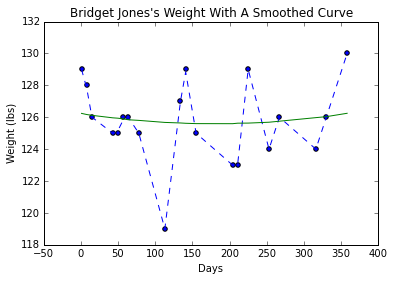

In [3]:
# x: location; h: bandwidth; xp, yp: data points (vectors)
def loess( x, h, xp, yp ):
    from numpy import *
    w = exp( -0.5*( ((x-xp)/h)**2 )/sqrt(2*pi*h**2) )
    b = sum(w*xp)*sum(w*yp) - sum(w)*sum(w*xp*yp)
    b /= sum(w*xp)**2 - sum(w)*sum(w*xp**2)
    a = ( sum(w*yp) - b*sum(w*xp) )/sum(w)
    return a + b*x

smoothed_weights_1 = []
smoothed_weights_2 = []
bandwidth_1 = 2
bandwidth_2 = 25
for day_no in day_nos:
    smoothed_weights_1.append(loess(day_no, bandwidth_1, np.asarray(day_nos), np.array(weights)))
    smoothed_weights_2.append(loess(day_no, bandwidth_2, np.asarray(day_nos), np.array(weights)))

plt.figure(2)
plt.scatter( np.asarray(day_nos), np.asarray(weights))
plt.plot(np.asarray(day_nos), np.asarray(smoothed_weights_1),'--')
plt.plot(np.asarray(day_nos), np.asarray(smoothed_weights_2))
plt.title('Bridget Jones\'s Weight With A Smoothed Curve')
plt.xlabel('Days')
plt.ylabel('Weight (lbs)')

## NOTES

* It turns out that there is some trend when we look at linear regression $bandwidth_2=25$ as opposed to lowess, $bandwidth_1=2$. I am a bit confused and would like some more validation. Perhaps it is worthwhile to double check LOWESS code and add more data. I am going to check the residuals and how they look. 


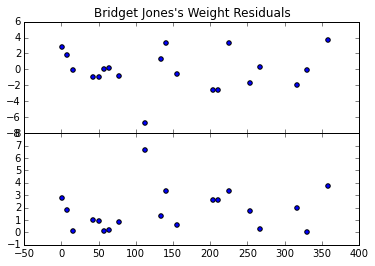

In [19]:
residuals_2 = []
absolute_residuals_2 = []
for ii in xrange(0, len(weights)):
    residuals_2.append(weights[ii]-smoothed_weights_2[ii])
    absolute_residuals_2.append(np.absolute(residuals_2[ii]))
plt.figure(3)
f, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.scatter(np.asarray(day_nos), np.asarray(residuals_2))
ax1.set_title('Bridget Jones\'s Weight Residuals' )
ax2.scatter(np.asarray(day_nos), np.asarray(absolute_residuals_2))
f.subplots_adjust(hspace=0)



## NOTES

The residuals apparently need to be symmetrically distributed around zero and have constant variance throughout. I guess this is true except for one outliers. One last thing to do is to do a QQ plot. You plot the CDF of the residuals and compare it against the CDF of a standard normal. 

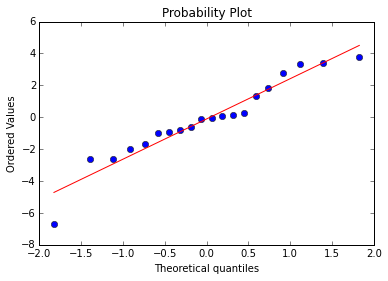

In [20]:
import scipy.stats as stats
plt.figure(4)
stats.probplot(residuals_2, dist="norm", plot=plt)

plt.show()